In [3]:
import pytesseract
from PIL import Image
import os
import glob

In [2]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\parth.shastri.AD1\AppData\Local\Tesseract-OCR\tesseract.exe"

In [5]:
path = r"C:\Users\parth.shastri.AD1\PycharmProjects\DocExtraction\data\Form_16_jpeg"
for i, name in enumerate(os.listdir(path)):
    os.rename(os.path.join(path, name), os.path.join(path, "finance_doc_{}.jpg".format(i+1)))

In [7]:
image = Image.open(os.path.join(path, os.listdir(path)[-2])).convert("RGB")
out = pytesseract.image_to_data(image, output_type="data.frame")

In [8]:
ocr_df = out.dropna()
ocr_df.head()


,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
4,5,1,1,1,1,1,713,159,94,24,95.755463,FORM
5,5,1,1,1,1,2,821,159,54,24,92.111115,NO.
6,5,1,1,1,1,3,889,159,82,24,92.111115,12BA
8,5,1,1,1,2,1,730,197,51,21,75.401123,[{See
9,5,1,1,1,2,2,790,197,43,16,89.850533,Rule


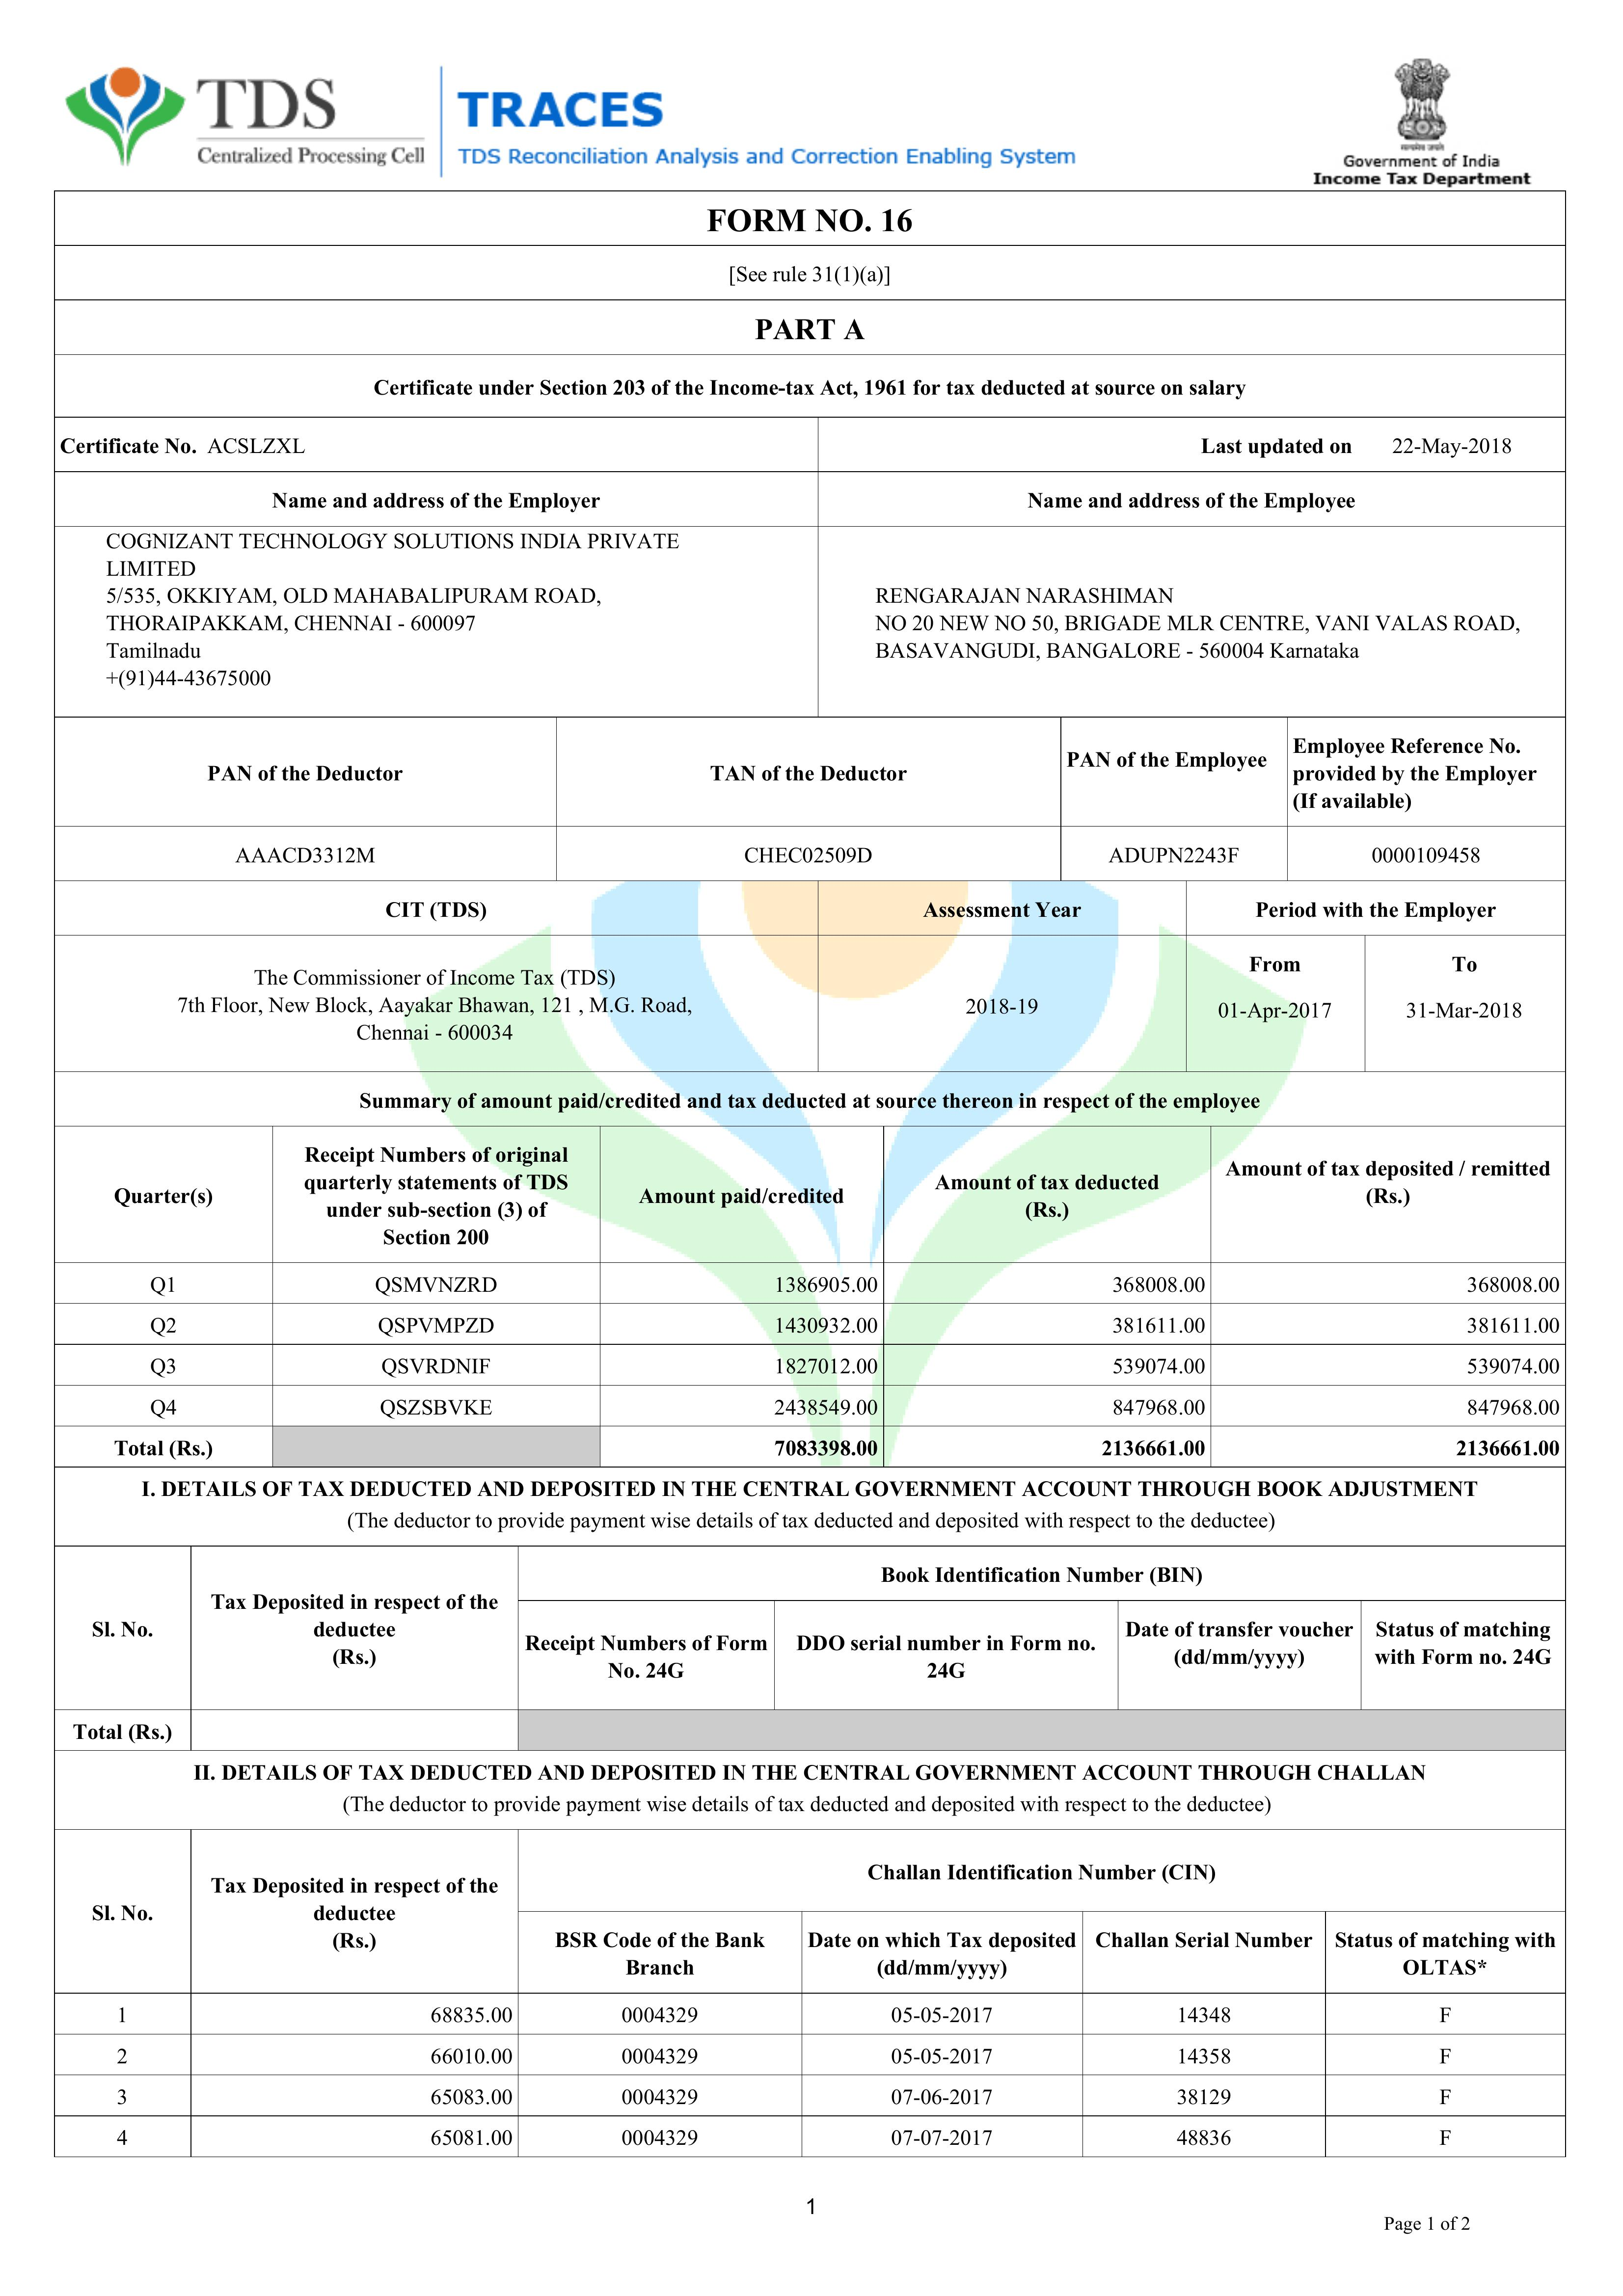

In [7]:
image

In [6]:
try:
    os.mkdir( r"C:\Users\parth.shastri.AD1\PycharmProjects\DocExtraction\data\annotations")
except OSError:
    print("The dir already exists!!!")

form_names = os.listdir(path)

for i, forms in enumerate(glob.glob(os.path.join(path, "*.jpg"))):
    img = Image.open(forms).convert("RGB")
    ocr_df = pytesseract.image_to_data(img, output_type="data.frame")
    ocr_df = ocr_df.dropna()
    ocr_df.to_csv(r"C:\Users\parth.shastri.AD1\PycharmProjects\DocExtraction\data\annotations\ocr_anno_{}.csv".format(form_names[i]))